In [1]:
from unityagents import UnityEnvironment
from collections import deque
import numpy as np
import dqn_runner
%load_ext autoreload
%autoreload 2

env = UnityEnvironment(file_name="Banana_Linux_NoVis/Banana.x86_64")
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

%matplotlib inline

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 100	Average Score: 0.89
Episode 200	Average Score: 4.09
Episode 300	Average Score: 7.65
Episode 400	Average Score: 9.27
Episode 500	Average Score: 11.36
Episode 552	Average Score: 13.07
Environment solved in 452 episodes!	Average Score: 13.07


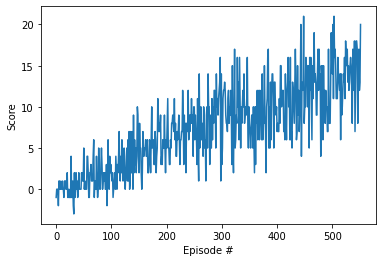

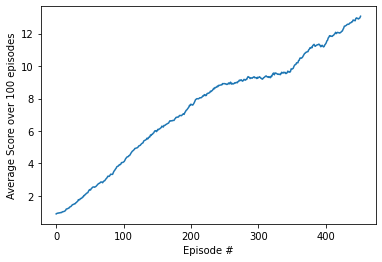

In [2]:
import dqn_agent
Agent = dqn_agent.Agent
agent = Agent(state_size=37, action_size=4, seed=0)

scores = dqn_runner.dqn(env, agent, n_episodes=1000, brain_name=brain_name, state_file_name='dqn_checkpoint.pth')

dqn_runner.plot_scores(scores)

Episode 100	Average Score: 0.56
Episode 200	Average Score: 3.91
Episode 300	Average Score: 7.95
Episode 400	Average Score: 10.95
Episode 500	Average Score: 12.49
Episode 509	Average Score: 13.03
Environment solved in 409 episodes!	Average Score: 13.03


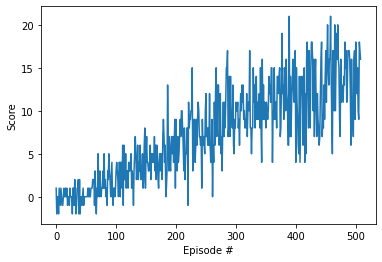

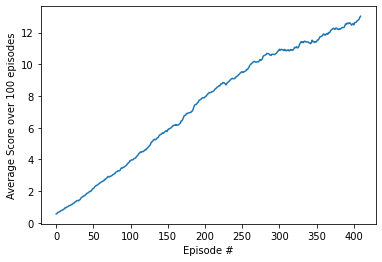

In [3]:
import double_dqn_agent
Agent = double_dqn_agent.Agent
agent = Agent(state_size=37, action_size=4, seed=0)

scores = dqn_runner.dqn(env, agent, n_episodes=1000, brain_name=brain_name, state_file_name='double_dqn_checkpoint.pth')

dqn_runner.plot_scores(scores)

Episode 100	Average Score: 0.28
Episode 200	Average Score: 4.70
Episode 300	Average Score: 8.13
Episode 400	Average Score: 11.72
Episode 445	Average Score: 13.01
Environment solved in 345 episodes!	Average Score: 13.01


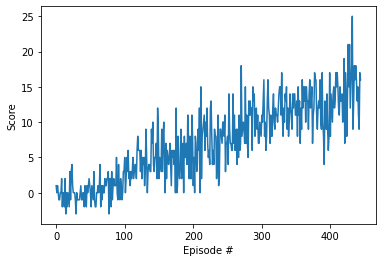

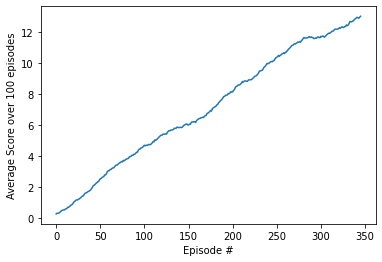

In [4]:
import dueling_model
Agent = dqn_agent.Agent
agent = Agent(state_size=37, action_size=4, seed=0, qNetwork=dueling_model.QNetwork)

scores = dqn_runner.dqn(env, agent, n_episodes=1000, brain_name=brain_name, state_file_name='dueling_dqn_checkpoint.pth')

dqn_runner.plot_scores(scores)

Episode 100	Average Score: 0.72
Episode 200	Average Score: 4.65
Episode 300	Average Score: 7.81
Episode 400	Average Score: 10.06
Episode 500	Average Score: 12.60
Episode 537	Average Score: 13.00
Environment solved in 437 episodes!	Average Score: 13.00


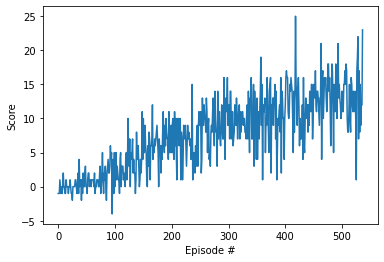

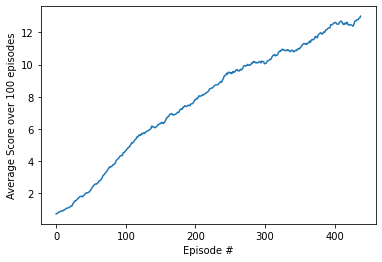

In [5]:
import per_dqn_agent
Agent = per_dqn_agent.Agent
agent = Agent(state_size=37, action_size=4, seed=0)

scores = dqn_runner.dqn(env, agent, n_episodes=1000, brain_name=brain_name, state_file_name='per_dqn_checkpoint.pth')

dqn_runner.plot_scores(scores)

Episode 100	Average Score: 0.80
Episode 200	Average Score: 3.93
Episode 300	Average Score: 8.64
Episode 400	Average Score: 10.07
Episode 500	Average Score: 13.05

Environment solved in 400 episodes!	Average Score: 13.05


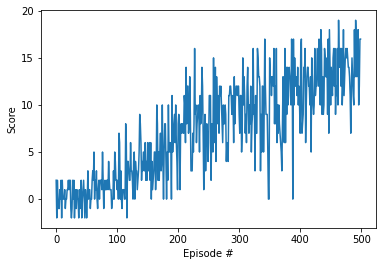

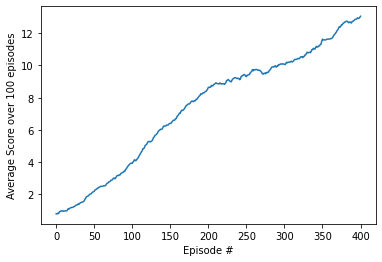

In [6]:
import double_dqn_agent
import per_dqn_agent
import model

class Double_PER_Agent(double_dqn_agent.Agent, per_dqn_agent.Agent):
    pass
agent = Double_PER_Agent(state_size=37, action_size=4, seed=0)

scores = dqn_runner.dqn(env, agent, n_episodes=1000, brain_name=brain_name, state_file_name='double_per_dqn_checkpoint.pth')

dqn_runner.plot_scores(scores)


Episode 100	Average Score: 0.98
Episode 200	Average Score: 4.42
Episode 300	Average Score: 8.18
Episode 400	Average Score: 11.20
Episode 500	Average Score: 12.42
Episode 531	Average Score: 13.00
Environment solved in 431 episodes!	Average Score: 13.00


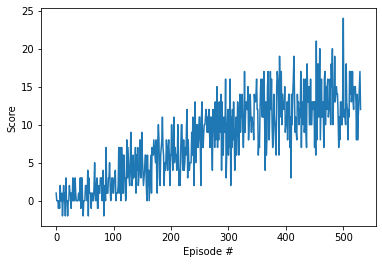

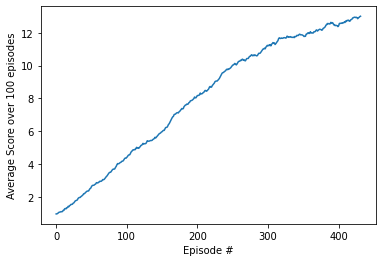

In [7]:
import double_dqn_agent
import per_dqn_agent
import dueling_model

class Double_PER_Agent(double_dqn_agent.Agent, per_dqn_agent.Agent):
    pass
agent = Double_PER_Agent(state_size=37, action_size=4, seed=0, qNetwork=dueling_model.QNetwork)

scores = dqn_runner.dqn(env, agent, n_episodes=1000, brain_name=brain_name, state_file_name='dueling_double_per_dqn_checkpoint.pth')

dqn_runner.plot_scores(scores)
